# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Data

In [5]:
import pandas as pd
from sklearn.datasets import load_iris


iris = load_iris()
feature = pd.DataFrame(iris['data'], columns = iris['feature_names'])
target = pd.DataFrame(iris['target'], columns=['class'])
data = pd.concat([feature,target], axis=1)
df = data.loc[data['class'] != 2]

# EDA

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


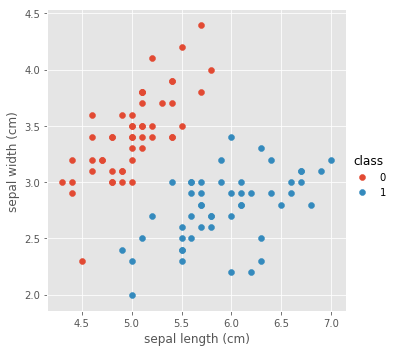

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
g = sns.FacetGrid(df, hue='class', size=5)
g.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')
g.add_legend()

# Preprocessing

In [16]:
from sklearn.model_selection import train_test_split


x = df.iloc[:, :2].values
y = df.iloc[:, 4].values

In [17]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 8, stratify = y)

In [18]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

# Modeling

In [19]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap


lr = LogisticRegression(C=100, random_state=1)
lr.fit(x_train_std, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Evaluation

In [20]:
from sklearn import metrics


testy_pred_prob = lr.predict_proba(x_test_std)
fpr, tpr, thresholds = metrics.roc_curve(y_test, testy_pred_prob[:,1], pos_label=None)
logreg_AUC=metrics.auc(fpr, tpr)
print(logreg_AUC)

1.0


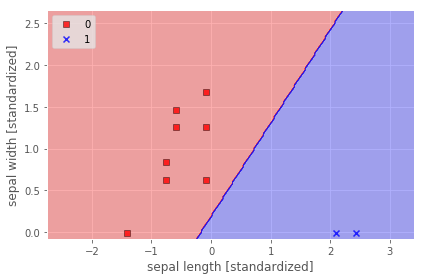

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, test_idx = None, resolution=0.02):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[ : len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:,0].max() + 1
    x2_min, x2_max = x[ : 1].min(), x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                           np.arange(x2_min, x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0],
                    y = x[y == cl, 1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
    
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c = '',
                    edgecolor = 'black',
                    alpha=1.0,
                    linewidth=1,
                    marker = 'o',
                    s=100,
                    label = 'test set')

        
plot_decision_regions(x_test_std, y_test, classifier = lr)
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

   micro avg       0.95      0.95      0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Accuracy: 0.95
Precision: 1.0
Recall: 0.9090909090909091
F-1: 0.9523809523809523
AUC: 1.0


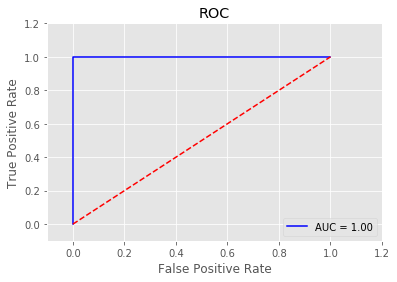

Confusion Matrix:
[[ 9  0]
 [ 1 10]]
True positives: 9
False positives: 1
True negatives: 10
False negatives: 0




In [22]:
#ROC & AUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix


def evaluate_model(predicted_prob, predicted, actual):

    def Roc_Auc(predicted_prob, actual):
        fpr, tpr, thresholds = roc_curve(actual, predicted_prob[:,1], pos_label=None)
        return auc(fpr, tpr)
    
    # Table-Type Plotting
    #print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    print('Classification Report:\n{}'.format(classification_report(predicted, actual)))
    print('Accuracy: {}'.format(accuracy_score(predicted, actual)))
    print('Precision: {}'.format(precision_score(predicted, actual)))
    print('Recall: {}'.format(recall_score(predicted, actual)))
    print('F-1: {}'.format(f1_score(predicted, actual)))
    print('AUC: {}'.format(Roc_Auc(predicted_prob, actual)))  
        
    # ROC Curve Plotting
    fpr, tpr, thresh = roc_curve(actual, predicted_prob[:,1], pos_label=None)
    roc_auc = Roc_Auc(predicted_prob, actual)   
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    tp, fp, fn, tn  = confusion_matrix(actual, predicted).ravel()
    print("True positives: " + str(tp))
    print("False positives: " + str(fp))
    print("True negatives: " + str(tn))
    print("False negatives: " + str(fn))
    print('\n')


evaluate_model(lr.predict_proba(x_test_std), 
               lr.predict(x_test_std), 
               y_test)